<center><h1>Proyecto final</h1></center>
<center><h3>IBM SkillsBuild Europa - Análisis de datos</h3></center>

# Requisitos



* Conocimientos de Python, Power BI o Tableau.
* Comprensión de la limpieza de datos.
* Comprensión de la visualización de datos.



#### Nivel de ejercicio: Intermedio



#### Duración: aproximadamente 3 horas


### Análisis de datos de Airbnb:



#### Objetivo:



En este ejercicio, practicarás el análisis de datos sobre un conjunto de datos abiertos procedentes de Airbnb. Algunas de las tareas incluyen:

- limpieza de datos,
- transformación de datos y
- visualización de datos.



#### Resumen sobre los datos de Airbnb:



Los criterios principales de la gente cuando visita lugares nuevos son contar con alojamiento y comida a precios razonables. Airbnb (Air-Bed-Breakfast) es un mercado en línea creado para satisfacer esta necesidad, pues permite a la gente alquilar sus casas durante plazos cortos. Estos servicios se ofrecen a un precio relativamente inferior al de los hoteles y en diversas ubicaciones geográficas. Además, personas de todo el mundo prefieren el servicio hogareño y económico.



#### Fuente de los datos



Puedes obtener el <i>dataset</i> para realizar este proyecto en el siguiente enlace: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata



Este <i>dataset</i> contiene información sobre los alojamientos, tal como el barrio, el tipo de habitación, el precio, la disponibilidad, las opiniones, los gastos de servicio, la política de cancelación y las normas de uso de la casa.



¡Te deseamos lo mejor en tu análisis de los datos de Airbnb!

## Tarea 1: Carga de datos (Python)



1. Lee el fichero csv y cárgarlo en un <i>dataframe</i> de pandas.
2. Visualiza las cinco primeras filas de tu <i>dataframe</i>.
3. Visualize los tipos de datos de las columnas.

In [38]:
import pandas as pd
file_path = 'Airbnb_data.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path, low_memory=False)

# Display the first few rows of the DataFrame

In [39]:
## Muestra las primeras 5 filas.
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [40]:
## Muestra los tipos de datos.
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## Tarea 2a: Limpieza de datos (cualquier herramienta)


1. Elimina las columnas no deseadas del <i>dataframe</i>, entre ellas se incluyen `host id`, `id`, `country` y `country code`.
2. Indica la razón por la cual se han eliminado estas columnas para tu análisis de datos.


Si utilizas Python para este ejercicio, incluye el código que hayas utilizado en las celdas siguientes. Si utilizas cualquier otra herramienta, incluye capturas de pantalla tomadas antes y después de eliminar las columnas.

In [41]:
columnas_eliminar = ['host id', 'id', 'country', 'country code']

# Si todas las columnas existen, eliminarlas
if columnas_existen:
    df = df.drop(columns=columnas_eliminar)
    print("Columnas eliminadas correctamente.")
else:
    print("Algunas columnas no existen en el DataFrame.")
df.columns

Algunas columnas no existen en el DataFrame.


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

- Se han eliminado estas columnas para tener unos datos más limpios y con la información que nos interesa realmente.
- El id y el host id se podrían considerar identificadores internos del sistema de aribnb que en nuestro caso no los necesitariamos.
- El country y country code es constante ya que es un dataset extraído en la misma región geográfica en este caso, Estados Unidos. No aportan ninguna información relevante.

## Tarea 2b: Limpieza de datos (Python)


- Compueba si hay valores nulos y muestra el recuento en orden ascendente. **Si faltan valores, imputa los valores como consideres.**
- Comprueba si hay valores duplicados y elimínalos.
- Muestra el número total de registros antes y después de eliminar los duplicados.

In [42]:
## Comprueba si hay valores nulos y muestra el recuento en orden ascendente.

# Verifica si hay valores nulos y muestra el recuento en orden ascendente
nulos = df.isnull().sum().sort_values(ascending=True)

# Muestra el recuento de valores nulos
print("Recuento de valores nulos:")
print(nulos)

# Imputa los valores nulos según sea necesario
# Por ejemplo, puedes reemplazar los valores nulos en todas las columnas con el valor 0
for col in df.columns:
  if df[col].dtype == 'O':
    df[col].fillna(value=df[col].mode()[0], inplace=True)
  else:
    df[col].fillna(value=df[col].median(), inplace=True)
# Muestra las primeras filas del DataFrame después de la imputación
df.head()

Recuento de valores nulos:
id                                     0
room type                              0
host id                                0
long                                   8
lat                                    8
neighbourhood                         16
neighbourhood group                   29
cancellation_policy                   76
instant_bookable                     105
country code                         131
number of reviews                    183
Construction year                    214
price                                247
NAME                                 250
service fee                          273
host_identity_verified               289
calculated host listings count       319
review rate number                   326
host name                            406
minimum nights                       409
availability 365                     448
country                              532
reviews per month                  15879
last review                   

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,41662/AL
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,41662/AL
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,6/23/2019,0.74,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",41662/AL
3,1002755,Home away from home,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,#NAME?,41662/AL
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",41662/AL


In [43]:
## Comprueba si hay valores nulos y muestra el recuento en orden ascendente.

# Verifica si hay valores nulos y muestra el recuento en orden ascendente
nulos = df.isnull().sum().sort_values(ascending=True)

# Muestra el recuento de valores nulos
print("Recuento de valores nulos:")
print(nulos)

# Imputa los valores nulos según sea necesario
# Por ejemplo, puedes reemplazar los valores nulos en todas las columnas con el valor 0
df = df.fillna(0)

# Muestra las primeras filas del DataFrame después de la imputación
df.head()

Recuento de valores nulos:
id                                0
availability 365                  0
calculated host listings count    0
review rate number                0
reviews per month                 0
last review                       0
number of reviews                 0
minimum nights                    0
service fee                       0
price                             0
Construction year                 0
room type                         0
cancellation_policy               0
instant_bookable                  0
country code                      0
country                           0
long                              0
lat                               0
neighbourhood                     0
neighbourhood group               0
host name                         0
host_identity_verified            0
host id                           0
NAME                              0
house_rules                       0
license                           0
dtype: int64


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,41662/AL
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,41662/AL
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,6/23/2019,0.74,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",41662/AL
3,1002755,Home away from home,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,#NAME?,41662/AL
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",41662/AL


In [44]:
## Comprueba si hay valores duplicados y elimínalos.
total_registros_antes = len(df)
# Verifica si hay valores duplicados
duplicados = df.duplicated().sum()

# Muestra el recuento de valores duplicados
print(f"Recuento de valores duplicados: {duplicados}")

# Elimina los valores duplicados del DataFrame
df = df.drop_duplicates()

# Muestra las primeras filas del DataFrame después de eliminar duplicados
df.head()

Recuento de valores duplicados: 541


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,41662/AL
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,41662/AL
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,6/23/2019,0.74,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",41662/AL
3,1002755,Home away from home,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,#NAME?,41662/AL
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",41662/AL


In [61]:
## Muestra el número total de registros antes y después de eliminar los duplicados.
# Número total de registros antes de eliminar duplicados

# Elimina los valores duplicados del DataFrame
df = df.drop_duplicates()

# Número total de registros después de eliminar duplicados
total_registros_despues = len(df)
diferencia_registros = total_registros_antes - total_registros_despues

# Muestra los resultados
print(f"Número total de registros antes de eliminar duplicados: {total_registros_antes}")
print(f"Número total de registros después de eliminar duplicados: {total_registros_despues}")
print(f"Número total de registros eliminados: {diferencia_registros}")

Número total de registros antes de eliminar duplicados: 102599
Número total de registros después de eliminar duplicados: 99304
Número total de registros eliminados: 3295


## Tarea 3: Transformación de datos (cualquier herramienta)





- Cambia el nombre de la columna `availability 365` a `days_booked`.
- Convierte todos los nombres de columna a minúsculas y sustituye los espacios en los nombres de columna por un guión bajo "_".
- Elimina el signo de dólares y la coma de las columnas `price` y `service_fee`. Si es necesario, convierte estas dos columnas al tipo de datos adecuado.



Si utilizas Python para este ejercicio, incluye el código que hayas utilizado en las celdas siguientes. Si utilizas cualquier otra herramienta, incluye capturas de pantalla de tu trabajo.

In [46]:
## Cambia el nombre de la columna.
df = df.rename(columns={'availability 365': 'days_booked'})

# Muestra las primeras filas del DataFrame después del cambio de nombre
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,days_booked,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,41662/AL
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,41662/AL
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,6/23/2019,0.74,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",41662/AL
3,1002755,Home away from home,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,#NAME?,41662/AL
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",41662/AL


In [47]:
## Convierte todos los nombres de columna a minúsculas y sustituye los espacios por un guión bajo "_".
df.columns = df.columns.str.lower().str.replace(' ', '_')

column_names = df.columns
print(column_names)

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count', 'days_booked',
       'house_rules', 'license'],
      dtype='object')


In [48]:
# Muestra solo los valores de las columnas 'price' y 'service_fee' antes de eliminar signo dolar y coma
valores_price_service_fee1 = df[['price', 'service_fee']]

# Muestra las primeras filas del DataFrame con solo estas columnas
valores_price_service_fee1.head()

,price,service_fee
0,$966,$193
1,$142,$28
2,$620,$124
3,$368,$74
4,$204,$41


In [49]:
# Muestra tipo de datos de las columnas 'price' y 'service_fee' 
tipo_de_datos_price = df['price'].dtype
tipo_de_datos_service = df['service_fee'].dtype

print("Tipo de datos de la columna 'price':", tipo_de_datos_price)
print("Tipo de datos de la columna 'service_free':",tipo_de_datos_service )

Tipo de datos de la columna 'price': object
Tipo de datos de la columna 'service_free': object


In [50]:
# Elimina el signo de dólar y la coma de las columnas 'price' y 'service_fee'
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service_fee'] = df['service_fee'].replace('[\$,]', '', regex=True).astype(float)

# Muestra las primeras filas del DataFrame con solo estas columnas modificadas
valores_price_service_fee = df[['price', 'service_fee']]
valores_price_service_fee.head()

,price,service_fee
0,966.0,193.0
1,142.0,28.0
2,620.0,124.0
3,368.0,74.0
4,204.0,41.0


In [51]:
tipo_de_datos_price = df['price'].dtype
tipo_de_datos_service = df['service_fee'].dtype

print("Tipo de datos de la columna 'price':", tipo_de_datos_price)
print("Tipo de datos de la columna 'service_free':",tipo_de_datos_service )

Tipo de datos de la columna 'price': float64
Tipo de datos de la columna 'service_free': float64


### Tarea 4: Análisis exploratorio de datos (cualquier herramienta)



- Enumera los tipos de habitaciones disponibles en el <i>dataset</i>.
- ¿Qué tipo de habitación tiene la política de cancelación más estricta?
- Enumera el precio medio por barrio y señala cuál es el conjunto de barrios más caro para alquilar.



Si utilizas Python para este ejercicio, incluye el código que hayas utilizado en las celdas siguientes. Si utilizas cualquier otra herramienta, incluye capturas de pantalla de tu trabajo.

In [52]:
## Enumera los tipos de habitaciones disponibles en Airbnb.
# Enumera los tipos de habitaciones disponibles
tipos_de_habitaciones = df['room_type'].unique()

# Muestra los tipos de habitaciones
print("Tipos de habitaciones disponibles:")
for tipo in tipos_de_habitaciones:
    print(tipo)

Tipos de habitaciones disponibles:
Private room
Entire home/apt
Shared room
Hotel room


In [53]:
#¿Qué tipo de habitación tiene la política de cancelación más estricta?
# Agrupa por 'room_type' y 'cancellation_policy' y cuenta las ocurrencias
count_by_policy = df.groupby(['room_type', 'cancellation_policy']).size().reset_index(name='count')

# Encuentra la política de cancelación más estricta para cada tipo de habitación
strictest_policy = count_by_policy.sort_values('count', ascending=False).drop_duplicates('room_type')

# Muestra el resultado
print("Tipo de habitación con la política de cancelación más estricta: shared room")
print(strictest_policy[['room_type', 'cancellation_policy']])

Tipo de habitación con la política de cancelación más estricta: shared room
          room_type cancellation_policy
1   Entire home/apt            moderate
7      Private room            moderate
11      Shared room              strict
3        Hotel room            flexible


In [54]:
## Enumera los precios por barrio y menciona también cuál es el grupo de barrios con alquileres más caros.
# Agrupa por 'neighbourhood' y calcula el precio promedio por barrio
precios_por_barrio = df.groupby('neighbourhood')['price'].mean().reset_index(name='precio_promedio')

# Ordena los barrios por precio promedio de forma descendente
precios_por_barrio = precios_por_barrio.sort_values('precio_promedio', ascending=False)

# Muestra los precios promedio por barrio
print("Precios promedio por barrio:")
print(precios_por_barrio)

Precios promedio por barrio:
              neighbourhood  precio_promedio
144                New Dorp      1045.000000
35   Chelsea, Staten Island      1042.000000
83           Fort Wadsworth      1024.000000
119             Little Neck       817.750000
110           Jamaica Hills       812.904762
..                      ...              ...
168            Richmondtown       373.400000
21             Breezy Point       309.888889
175               Rossville       300.666667
187          Spuyten Duyvil       293.444444
117         Lighthouse Hill       107.666667

[224 rows x 2 columns]


In [55]:
print("\nBarrios con alquiler más caro:")
for i in range(3):
    barrio_mas_caro = precios_por_barrio.iloc[i]['neighbourhood']
    print(barrio_mas_caro)


Barrios con alquiler más caro:
New Dorp
Chelsea, Staten Island
Fort Wadsworth


## Tarea 5a: Visualización de datos (Cualquier herramienta)
* Enumere los 10 barrios más caros por orden creciente de precio con la ayuda de un gráfico de barras horizontales. ¿Cuál es el barrio más barato?
* Enumere los barrios que ofrecen alquileres a corto plazo de menos de 10 días. Ilustrar con un gráfico de barras
* Enumere los precios con respecto al tipo de habitación utilizando un gráfico de barras y exponga también sus inferencias.
* Cree un gráfico circular que muestre la distribución de los días reservados para cada grupo de barrios.

Si utiliza Python para este ejercicio, por favor incluya el código en las celdas de abajo. Si utiliza cualquier otra herramienta, por favor incluya pantallazos de su trabajo.

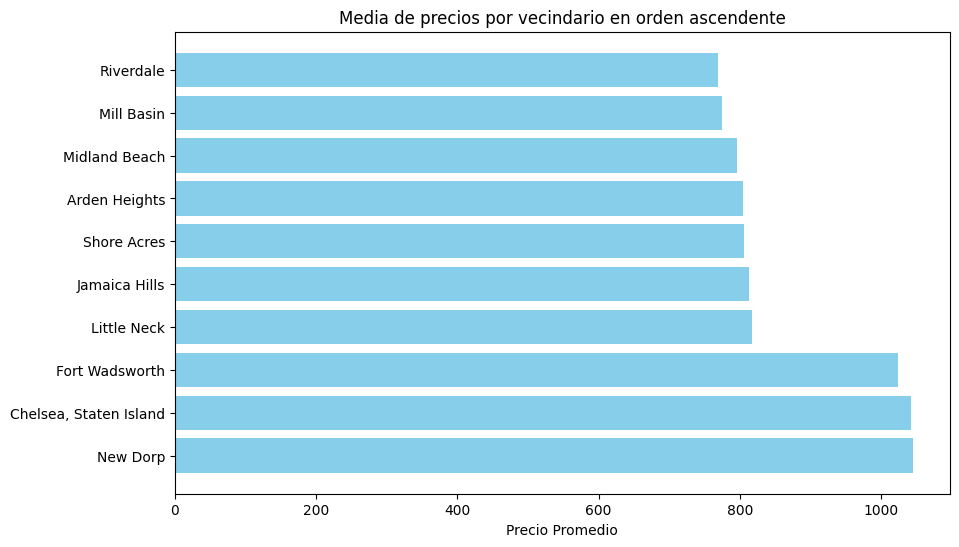


Barrio más barato: Lighthouse Hill


In [56]:
import matplotlib.pyplot as plt

# Agrupa por 'neighbourhood' y calcula el precio promedio por barrio
precios_por_barrio = df.groupby('neighbourhood')['price'].mean().reset_index(name='precio_promedio')

# Ordena los barrios por precio promedio de forma ascendente
barrios_mas_caros = precios_por_barrio.sort_values('precio_promedio', ascending=False).head(10)

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(barrios_mas_caros['neighbourhood'], barrios_mas_caros['precio_promedio'], color='skyblue')
plt.xlabel('Precio Promedio')
plt.title('Media de precios por vecindario en orden ascendente')
plt.show()

# Barrio más barato
barrio_mas_barato = precios_por_barrio.loc[precios_por_barrio['precio_promedio'].idxmin()]['neighbourhood']
print("\nBarrio más barato:", barrio_mas_barato)


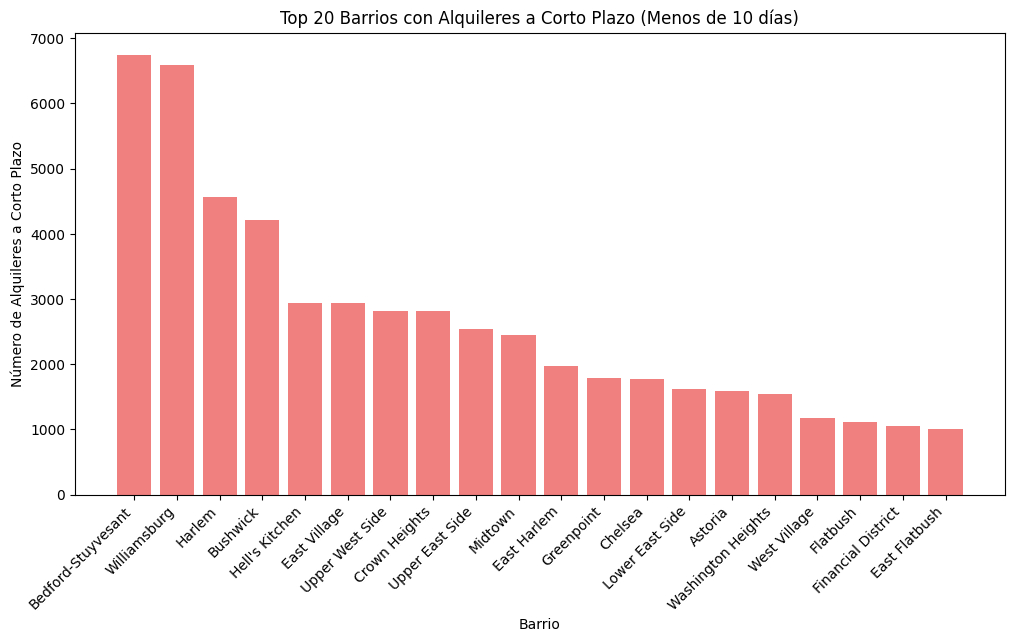

Top 20 Barrios con alquileres a corto plazo (menos de 10 días):
         neighbourhood  conteo
0   Bedford-Stuyvesant    6748
1         Williamsburg    6580
2               Harlem    4566
3             Bushwick    4213
4       Hell's Kitchen    2939
5         East Village    2933
6      Upper West Side    2815
7        Crown Heights    2812
8      Upper East Side    2542
9              Midtown    2454
10         East Harlem    1973
11          Greenpoint    1784
12             Chelsea    1767
13     Lower East Side    1613
14             Astoria    1585
15  Washington Heights    1537
16        West Village    1177
17            Flatbush    1119
18  Financial District    1057
19       East Flatbush    1001


In [57]:
import matplotlib.pyplot as plt

# Convierte la columna 'minimum_nights' a tipo numérico
df['minimum_nights'] = pd.to_numeric(df['minimum_nights'], errors='coerce')

# Filtra el DataFrame para alquileres a corto plazo de menos de 10 días
alquileres_corto_plazo = df[df['minimum_nights'] < 10]

# Conteo de alquileres a corto plazo por barrio
conteo_alquileres_corto_plazo = alquileres_corto_plazo['neighbourhood'].astype(str).value_counts().reset_index(name='conteo')

# Filtra solo los primeros 20 barrios (puedes ajustar según tus necesidades)
top_barrios = conteo_alquileres_corto_plazo.head(20)

# Gráfico de barras solo para los primeros 20 barrios
plt.figure(figsize=(12, 6))
plt.bar(top_barrios['neighbourhood'], top_barrios['conteo'], color='lightcoral')
plt.xlabel('Barrio')
plt.ylabel('Número de Alquileres a Corto Plazo')
plt.title('Top 20 Barrios con Alquileres a Corto Plazo (Menos de 10 días)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Enumera los primeros 20 barrios con alquileres a corto plazo
print("Top 20 Barrios con alquileres a corto plazo (menos de 10 días):")
print(top_barrios[['neighbourhood', 'conteo']])



In [58]:
# Calcula la cantidad de barrios únicos en el DataFrame
cantidad_barrios = df['neighbourhood'].nunique()

# Muestra la cantidad de barrios
print("Cantidad de barrios:", cantidad_barrios)

Cantidad de barrios: 224


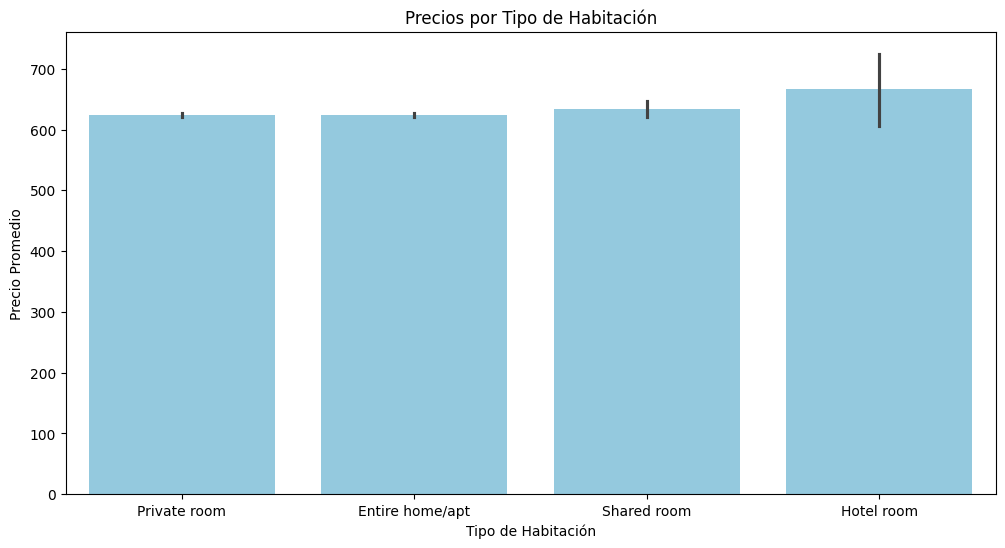

In [59]:
#Enumere los precios con respecto al tipo de habitación utilizando un gráfico de barras y exponga también sus inferencias.
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para precios por tipo de habitación
plt.figure(figsize=(12, 6))
sns.barplot(x='room_type', y='price', data=df, color='skyblue')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio Promedio')
plt.title('Precios por Tipo de Habitación')
plt.show()

Mis inferencias de este gráfico:

- Podemos ver que las habitaciones de los hoteles son las más caras.
- Es sorprendente que una shared room iguale el precio a una entire home/apt o una private room. Podemos suponer que hay factores que influyen en esta subida de precio como el el barrio donde se encuentran. Seguramente hay más shared room en los barrios más caros que hacen que el prome
- dio de precio aumente.

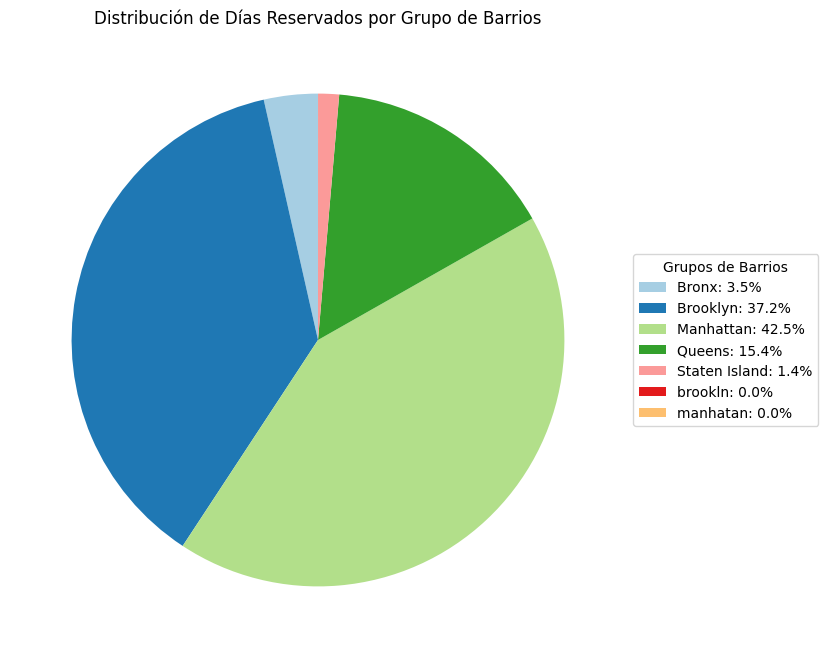

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir la columna 'days_booked' a números, tratando de corregir valores negativos y descartar extremadamente grandes
df['days_booked'] = pd.to_numeric(df['days_booked'].replace({'-': ''}, regex=True), errors='coerce')

# Eliminar valores extremadamente grandes (mayores que 365)
df = df[df['days_booked'] <= 365]

# Agrupa por grupo de barrios y suma los días reservados
dias_reservados_por_barrio = df.groupby('neighbourhood_group')['days_booked'].sum()

# Gráfico circular tipo pastel de Apple
fig, ax = plt.subplots(figsize=(8, 8))

# Crea el gráfico de pastel sin etiquetas
wedges, _, autotexts = ax.pie(dias_reservados_por_barrio, labels=None, autopct=lambda p: f"{p:.1f}%" if p > 0 else '', startangle=90, colors=plt.cm.Paired.colors)

# Agrega una leyenda con nombres y porcentajes
leyenda = [f"{grupo}: {porcentaje:.1f}%" for grupo, porcentaje in zip(dias_reservados_por_barrio.index, (dias_reservados_por_barrio / dias_reservados_por_barrio.sum()) * 100)]
ax.legend(wedges, leyenda, title='Grupos de Barrios', bbox_to_anchor=(1, 0.5), loc="center left")

# Elimina los textos internos del círculo
for autotext in autotexts:
    autotext.set_visible(False)

plt.title('Distribución de Días Reservados por Grupo de Barrios')
plt.show()

## Tarea 5b: Visualización de datos (Cualquier herramienta)

* ¿El precio del servicio y el precio de la habitación tienen un impacto mutuo? Ilustre esta relación con un gráfico de dispersión e indique sus inferencias
* Utilizando un gráfico lineal muestre en qué año tuvo lugar la máxima construcción de habitaciones.

Si utiliza Python para este ejercicio, incluya el código en las celdas siguientes. Si utiliza cualquier otra herramienta, incluya capturas de pantalla de su trabajo.

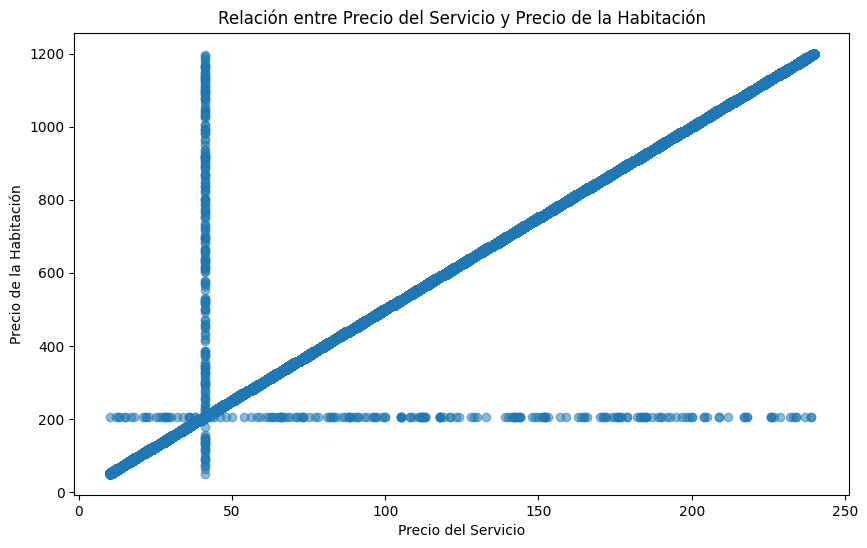

In [66]:
precio_servicio = df['service_fee']
precio_habitacion = df['price']

# Crear el gráfico de dispersión con tamaño de figura ajustado
plt.figure(figsize=(10, 6))

plt.scatter(precio_servicio, precio_habitacion, alpha=0.5)  # Ajusta alpha según sea necesario

# Agregar etiquetas a los ejes
plt.xlabel('Precio del Servicio')
plt.ylabel('Precio de la Habitación')

# Agregar un título al gráfico
plt.title('Relación entre Precio del Servicio y Precio de la Habitación')

# Mostrar el gráfico
plt.show()

- Observamos que la línea de dispersión es positiva, así que a medida que aumenta el precio del servicio también aumenta el precio de la habitación.

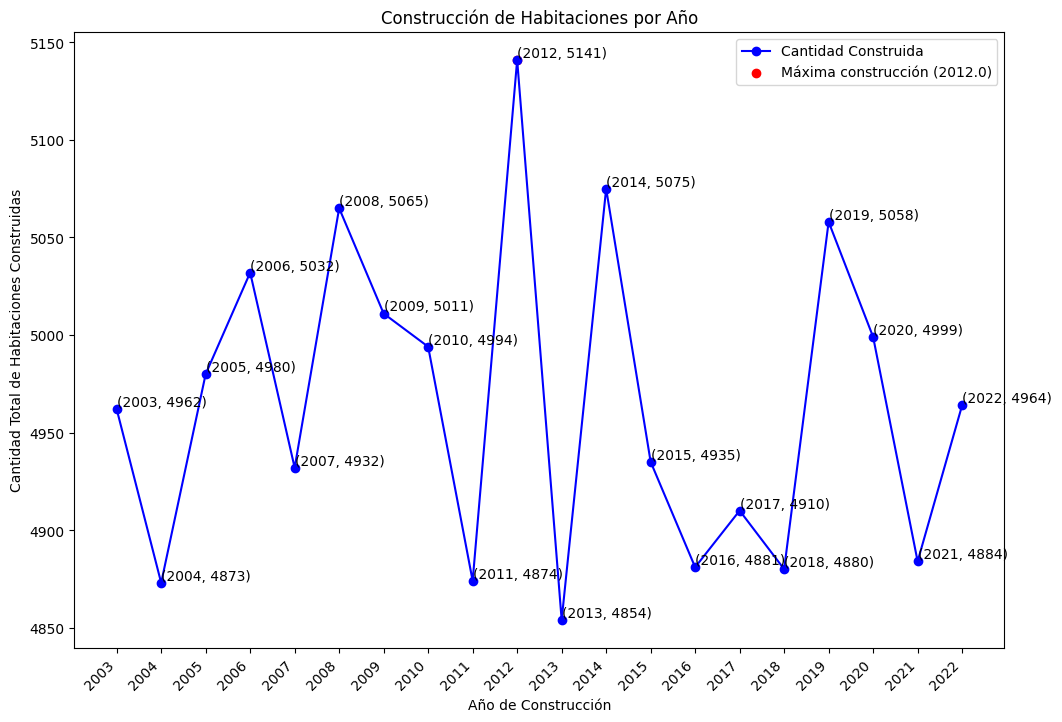

In [67]:
import matplotlib.pyplot as plt

construccion_por_anio = df.groupby('construction_year').size()

# Encontrar el año con la máxima construcción de habitaciones
anio_max_construccion = construccion_por_anio.idxmax()

plt.figure(figsize=(12, 8))

# Crear el gráfico de línea
plt.plot(construccion_por_anio.index, construccion_por_anio.values, marker='o', linestyle='-', color='b', label='Cantidad Construida')

# Resaltar el año con la máxima construcción en rojo
plt.scatter(anio_max_construccion, construccion_por_anio[anio_max_construccion], color='red', label=f'Máxima construcción ({anio_max_construccion})')

# Agregar etiquetas a cada punto del gráfico
for year, count in zip(construccion_por_anio.index, construccion_por_anio.values):
    plt.text(year, count, f'({int(year)}, {count})', ha='left', va='bottom')

# Agregar etiquetas a los ejes
plt.xlabel('Año de Construcción')
plt.ylabel('Cantidad Total de Habitaciones Construidas')

# Agregar un título al gráfico
plt.title('Construcción de Habitaciones por Año')

# Configurar las marcas y etiquetas del eje x
plt.xticks([int(year) for year in construccion_por_anio.index], rotation=45, ha="right")

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

## Tarea 5c: Visualización de datos (Cualquier herramienta)

* Con la ayuda de gráficos de caja ilustra lo siguiente
 * Efecto del número de tasa de revisión en el precio
 * Efecto de la identidad del host verificada en el precio

Si utiliza Python para este ejercicio, por favor incluya el código en las celdas de abajo. Si utiliza cualquier otra herramienta, por favor incluya capturas de pantalla de su trabajo.

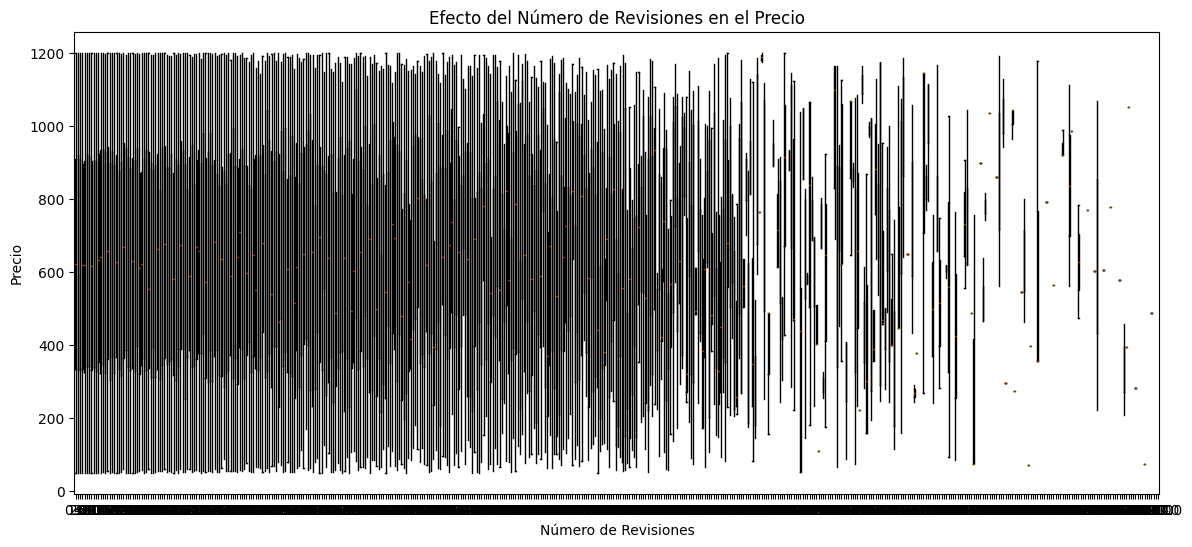

In [68]:
import matplotlib.pyplot as plt

# Asegúrate de tener las columnas 'number_of_reviews' y 'price' con datos numéricos en tu DataFrame df
# Si es necesario, convierte las columnas a tipo numérico usando pd.to_numeric()

plt.figure(figsize=(14, 6))

# Create a boxplot for each unique value in 'number_of_reviews'
unique_reviews = df['number_of_reviews'].unique()

# Sort the unique values for better visualization
unique_reviews.sort()

positions = list(range(1, len(unique_reviews) + 1))

for i, num_reviews in zip(positions, unique_reviews):
    subset_data = df[df['number_of_reviews'] == num_reviews]['price']
    plt.boxplot(subset_data, positions=[i], showfliers=False)

plt.xlabel('Número de Revisiones')
plt.ylabel('Precio')
plt.title('Efecto del Número de Revisiones en el Precio')

# Set x-axis labels
plt.xticks(positions, unique_reviews)

plt.show()

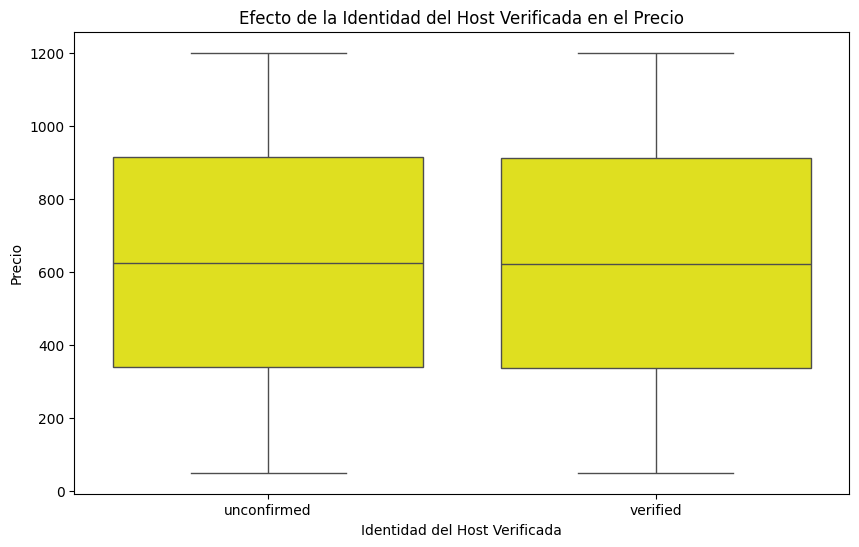

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de caja con color amarillo
plt.figure(figsize=(10, 6))
sns.boxplot(x='host_identity_verified', y='price', data=df, color='yellow')

# Agregar etiquetas a los ejes
plt.xlabel('Identidad del Host Verificada')
plt.ylabel('Precio')
plt.title('Efecto de la Identidad del Host Verificada en el Precio')

# Mostrar el gráfico
plt.show()
